<a href="https://colab.research.google.com/github/zoya-ivanova/-Data-Science/blob/main/%D0%A1%D0%B5%D0%BC_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Основные понятия  
**Обучение без учителя**  
- Обучение без учителя (Unsupervised Learning) - это метод машинного обучения, при котором модель обучается выявлять закономерности и скрытые взаимосвязи в наборах неразмеченных данных без контроля со стороны пользователя. В отличие от обучения с учителем, где модель обучается на размеченных данных с известными ответами, при обучении без учителя алгоритму не сообщается конечная цель или шаблоны, а только предоставляются массивы данных, которые модель должна самостоятельно анализировать и находить в них скрытые закономерности .

- Обучение без учителя часто используется для предобработки данных перед применением других алгоритмов машинного обучения, так как позволяет выявить скрытые структуры и закономерности в данных.

1. Понижение размерности  
  **Понижение размерности (Dimensionality Reduction)** - это преобразование данных, состоящее в уменьшении числа признаков (переменных) путем получения главных признаков . Это необходимо, когда размерность исходного пространства признаков очень велика, что замедляет процесс обучения модели и затрудняет поиск хорошего решения.  
  **Основные методы понижения размерности:**
  - Выбор признаков (Feature Selection) - отбор наиболее информативных признаков из исходного набора. Например, отбор признаков по порогу значимости корреляции .
  - Выделение признаков (Feature Extraction) - получение новых признаков путем преобразования исходных. Например, метод главных компонент (PCA) .
  - Понижение размерности позволяет ускорить процесс обучения модели, уменьшить избыточность данных и улучшить их визуализацию. Однако оно может привести к потере части информации, поэтому важно найти баланс между сокращением размерности и сохранением качества модели .
2. **Алгоритмы понижения размерности**
Наиболее популярные алгоритмы понижения размерности:
  - Метод главных компонент (PCA) - выделение линейных комбинаций признаков, объясняющих максимальную дисперсию данных .
  - Неотрицательное матричное разложение (NMF) - разложение неотрицательной матрицы на произведение двух неотрицательных матриц, позволяющее находить скрытые структуры в данных .
  - t-SNE - нелинейный метод, сохраняющий локальную структуру данных в низкоразмерном пространстве .
  - UMAP - новый алгоритм, показывающий лучшую производительность, чем t-SNE, особенно на больших наборах данных .

Выбор конкретного алгоритма понижения размерности зависит от особенностей задачи и данных. Важно экспериментировать с различными методами и оценивать их влияние на качество модели.
Related

##Задание 1
**Анализ работы метода PCA на медицинских данных**

Цель: Проанализировать результат работы метода главных компонент на данных Covid Data.csv

- Используйте метод главных компонент (PCA) для сокращения размерности датасета, содержащего биологические биомаркеры пациентов.
- Постройте график первых двух главных компонент и интерпретируйте, какие биомаркеры больше всего влияют на каждую компоненту.
- Подберите оптимальное количества компонент в PCA, которое позволяет сохранить максимальное количество информации без значительной потери данных




PCA (Principal Component Analysis) - это алгоритм машинного обучения без учителя, используемый для понижения размерности данных и выявления наиболее информативных признаков.  
Основные особенности PCA:  
- Позволяет проецировать данные высокой размерности на пространство меньшей размерности с минимальной потерей информации
- Находит новые оси (главные компоненты), вдоль которых дисперсия данных максимальна
- Главные компоненты являются линейными комбинациями исходных признаков
- Первая главная компонента объясняет максимальную долю дисперсии, вторая - максимальную долю оставшейся дисперсии и т.д.
- Может быть реализован через вычисление собственных векторов ковариационной матрицы или сингулярное разложение матрицы данных  

Основные этапы применения PCA:
- Стандартизация данных (если признаки имеют разные масштабы)
- Вычисление ковариационной матрицы для выявления корреляций
- Вычисление собственных векторов и значений ковариационной матрицы для получения главных компонент
- Выбор наиболее информативных главных компонент (по доле объясненной дисперсии)
- Проекция данных на пространство выбранных главных компонент

![Текст с описанием картинки](https://e7.pngegg.com/pngimages/521/532/png-clipart-principal-component-analysis-projection-geometry-scatters-angle-triangle.png)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/Covid Dataset.csv')

In [ ]:
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
for col in data.columns:
    data[col] = data[col].replace({'No': 0, 'Yes': 1})

In [ ]:
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

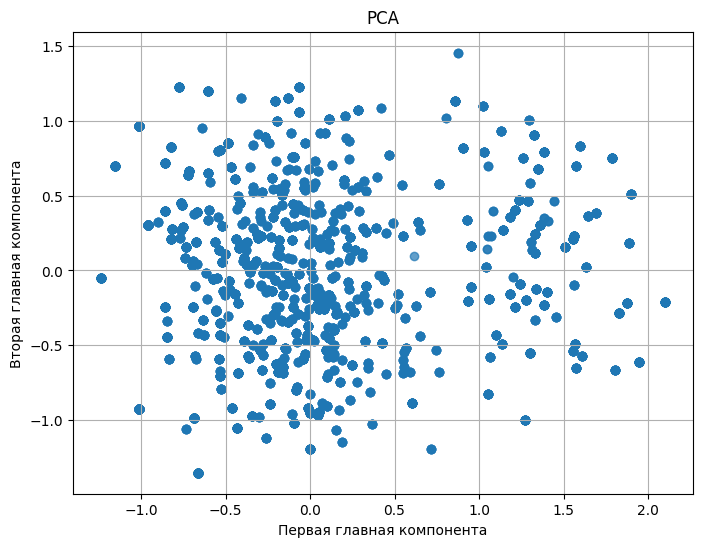

Вклад переменных в первую компоненту: [-0.3424746  -0.2147399  -0.27056226 -0.36377984 -0.04247761 -0.08130228
  0.10751196  0.09974239  0.00720462 -0.00396543 -0.09992628  0.06857793
 -0.00176935 -0.34348146 -0.33733611 -0.34593868 -0.15377775 -0.14561033
  0.          0.         -0.43598026]
Вклад переменных во вторую компоненту: [ 0.04295246 -0.03149697 -0.07707241 -0.07079714 -0.08567385 -0.31812411
  0.22979149 -0.56749588 -0.11654998 -0.08591226  0.35786389 -0.0836238
 -0.43256029 -0.30650326  0.10766174  0.21857278 -0.00389728  0.06452152
 -0.         -0.         -0.04681526]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA')
plt.grid(True)
plt.show()

# вывод влияния признаков на компоненты
print("Вклад переменных в первую компоненту:", pca.components_[0])
print("Вклад переменных во вторую компоненту:", pca.components_[1])


1. Центрирование данных:
   - Данные сгруппированы вокруг точки (0,0), что свидетельствует о том, что они были предварительно центрированы.

2. Распределение данных:
   - Основная масса данных сосредоточена в диапазоне значений первой главной компоненты от -1 до 1, однако есть некоторые выбросы, идущие до 2.
   - Вторая главная компонента варьируется от -1 до 1.5, с более высокой плотностью вокруг центральной оси (0).

3. Плотность:
   - Данные плотнее сгруппированы вокруг (0,0), и их плотность постепенно уменьшается по мере удаления от центра. Это указывает на то, что большинство данных находятся близко к средним значениям по выбранным главными компонентами переменным.

4. Кластеры и выбросы:
   - Нет явных кластеров, хотя можно заметить некоторое увеличение плотности данных в областях около (0,0).
   - Есть несколько точек, которые можно классифицировать как выбросы, особенно точки с высокими значениями первой главной компоненты (ближе к 2).
   
PCA показал, что данные могут быть сопоставимы по меньшей мере через две главные компоненты, но для более полного представления может потребоваться дальнейший анализ и визуализация.

In [ ]:
components = pca.components_

# Вывод вклада каждой переменной для первой и второй главных компонент
for i, (comp1, comp2) in enumerate(zip(components[0], components[1])):
    print(f"{data.columns[i]}: Первая компонента = {comp1:.4f}, Вторая компонента = {comp2:.4f}")

Breathing Problem: Первая компонента = -0.3425, Вторая компонента = 0.0430
Fever: Первая компонента = -0.2147, Вторая компонента = -0.0315
Dry Cough: Первая компонента = -0.2706, Вторая компонента = -0.0771
Sore throat: Первая компонента = -0.3638, Вторая компонента = -0.0708
Running Nose: Первая компонента = -0.0425, Вторая компонента = -0.0857
Asthma: Первая компонента = -0.0813, Вторая компонента = -0.3181
Chronic Lung Disease: Первая компонента = 0.1075, Вторая компонента = 0.2298
Headache: Первая компонента = 0.0997, Вторая компонента = -0.5675
Heart Disease: Первая компонента = 0.0072, Вторая компонента = -0.1165
Diabetes: Первая компонента = -0.0040, Вторая компонента = -0.0859
Hyper Tension: Первая компонента = -0.0999, Вторая компонента = 0.3579
Fatigue : Первая компонента = 0.0686, Вторая компонента = -0.0836
Gastrointestinal : Первая компонента = -0.0018, Вторая компонента = -0.4326
Abroad travel: Первая компонента = -0.3435, Вторая компонента = -0.3065
Contact with COVID Pa

Вклад каждой переменной в первые две компоненты PCA показывает:

Breathing Problem, Fever, Dry Cough, Sore throat, Running Nose: имеют отрицательные значения в первой компоненте и малые вторые компоненты. Это говорит, что эти признаки связаны с общей тенденцией, которая представлена первой компонентой. Возможно, она связана с симптомами респираторной инфекции.

Headache: имеет положительное значение в первой компоненте и отрицательное во второй. Это говорит, что этот признак выделяется на фоне остальных симптомов, возможно, потому что не является специфическим для респираторной инфекции.

Asthma, Chronic Lung Disease: имеют положительные значения в первой компоненте и малые вторые компоненты.  Это может означать, что эти признаки усиливают общую тенденцию, связанную с респираторными проблемами.

Hyper Tension: имеет отрицательное значение в первой компоненте и положительное во второй. Это может говорить, что гипертония связана с другой тенденцией, которая противопоставлена основной, связанной с респираторными проблемами.

Fatigue: имеет положительное значение в первой компоненте и отрицательное во второй. Это может говорить о том, что усталость связана с общим ухудшением состояния, которое не является строго респираторным.

Abroad Travel, Contact with COVID Patient, Attended Large Gathering, Visited Public Exposed Places:  имеют отрицательные значения в первой компоненте и положительные во второй. Это может говорить, что эти признаки связаны с другим фактором риска, например, с контактом с другими людьми.

Family Working in Public Exposed Places: имеет небольшое отрицательное значение в первой компоненте и положительное во второй. Это говорит, что этот признак не так сильно влияет на общую тенденцию, но может иметь значение для другой, связанной с риском контакта.

Wearing Masks, Sanitization from Market:  имеют нулевое значение в обеих компонентах. Это может означать, что эти признаки не сильно влияют на общие тенденции, выделенные PCA.

COVID-19: имеет отрицательное значение в первой компоненте и небольшое во второй. Это говорит, что наличие COVID-19 связано с общей тенденцией, связанной с респираторными проблемами, но также и с другим фактором риска, который выделяется во второй компоненте.

In [ ]:
# Суммирование долей дисперсии для определения сохранённых данных
variance_retained = np.sum(pca.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до 2 компонент.")

Сохранено 21.16% данных после понижения размерности до 2 компонент.


In [ ]:
pca1 = PCA(n_components=5)
X_pca = pca1.fit_transform(data)

In [ ]:
variance_retained = np.sum(pca1.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до 5 компонент.")

Сохранено 41.53% данных после понижения размерности до 5 компонент.


Кумулятивная сумма объясненной дисперсии:  
 Один из наиболее распространенных методов — построение графика кумулятивной суммы объясненной дисперсии в зависимости от числа компонент. Выберите количество компонент так, чтобы оно объясняло, например, не менее 90% общей дисперсии.

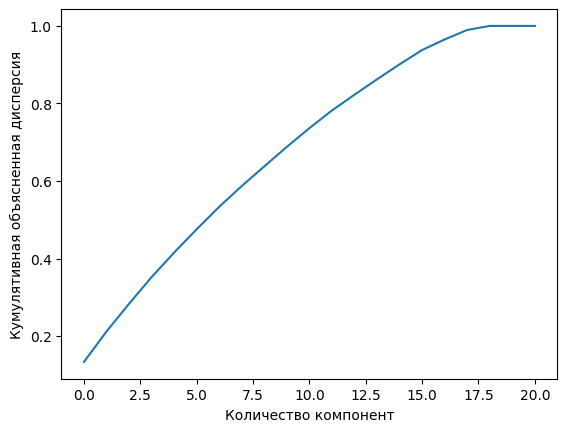

In [ ]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.show()

In [ ]:
pca90 = PCA(n_components=15)
X_pca = pca90.fit_transform(data)
variance_retained = np.sum(pca90.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до 15 компонент.")

Сохранено 90.09% данных после понижения размерности до 15 компонент.


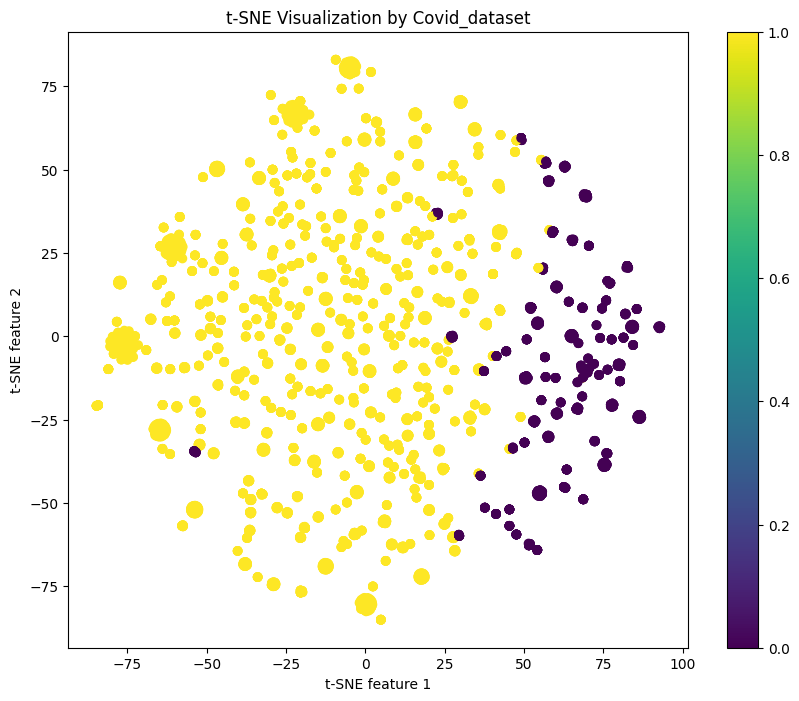

In [ ]:
# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42, init="random")
tsne_results = tsne.fit_transform(data)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['COVID-19'], cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE Visualization by Covid_dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [ ]:
! pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


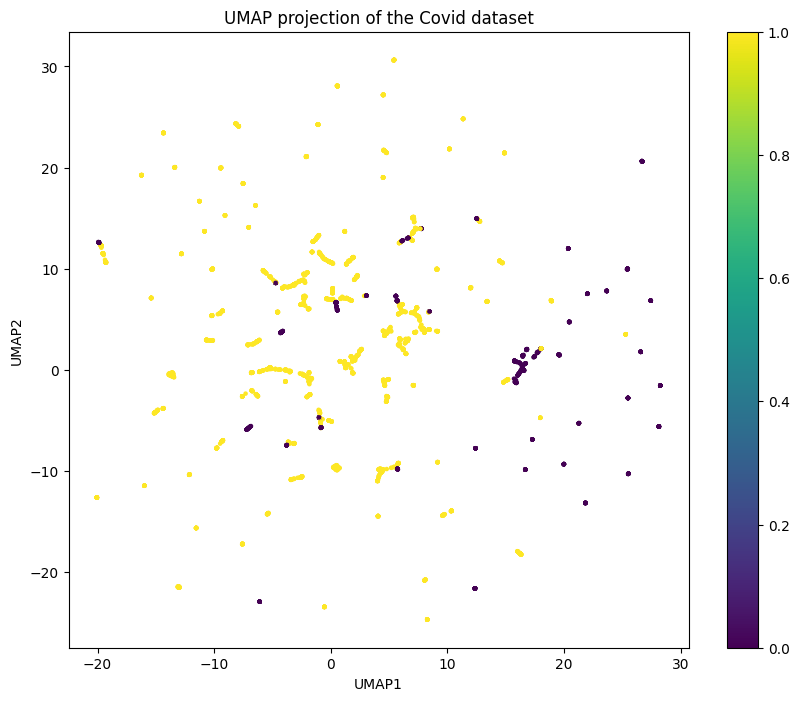

In [ ]:
from umap import UMAP
umap_model = UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(data)
# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data['COVID-19'], cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP projection of the Covid dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


##Задание 2
Цель: исследование структуры данных

 - Примените t-SNE для понижения размерности и визуализации данных потребителей, включающих демографические показатели, привычки покупок.   
 - Визуализируйте результаты в 2D, используя разные цвета для разных возрастных групп.
 - Визуализируйте результаты в 2D, используя разные цвета для пола клиента.

1. CustomerID: Уникальный идентификационный номер клиента. Используется для индивидуализации записей в базе данных.
2. Genre: Пол клиента.
3. Age: Возраст клиента. Важный демографический показатель, который может использоваться для анализа потребностей клиентов в зависимости от их возрастной категории.
4. Annual Income (k$): Годовой доход клиента, выраженный в тысячах долларов. Этот показатель может быть использован для сегментации клиентов по уровню дохода.
5. Spending Score (1-100): Оценка трат клиента, скорее всего, разработанная компанией для оценки или прогнозирования потребительской активности. Оценка может отражать, как часто и сколько клиент тратит в заведении, и может использоваться для целей customer relationship management (CRM).

t-SNE - это алгоритм машинного обучения, используемый для визуализации высокомерных данных путем их отображения в пространство низкой размерности (обычно 2D или 3D).   

Основные особенности t-SNE:
- Нелинейное снижение размерности: t-SNE использует нелинейное преобразование для проецирования данных из высокомерного пространства в низкомерное, в отличие от линейных методов, таких как PCA.
- Сохранение локальной структуры: t-SNE стремится сохранить близость между точками в исходном высокомерном пространстве при отображении в низкомерное пространство. Это позволяет выявлять кластеры и локальные структуры в данных.
- Вероятностный подход: t-SNE рассматривает высокомерные данные и их низкомерные представления как вероятностные распределения и минимизирует расхождение Кульбака-Лейблера между ними.
- Чувствительность к параметрам: Результаты t-SNE сильно зависят от выбора гиперпараметров, таких как перплексия и начальная инициализация. Необходим тщательный подбор параметров.

Основные этапы применения t-SNE:
- Предобработка данных (нормализация, стандартизация)
Выбор гиперпараметров (перплексия, количество итераций)
- Применение алгоритма t-SNE для проецирования данных в 2D или 3D пространство
- Визуализация полученного низкомерного представления данных

t-SNE широко используется в задачах визуализации высокомерных данных, таких как изображения, текстовые данные, биологические данные. Он позволяет выявлять скрытые структуры и кластеры в данных, что полезно для exploratory data analysis и понимания данных.

![](https://slideplayer.com/slide/14524740/90/images/5/Copyright+2017+Joshua+Starmer%2C.jpg)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data (1)/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


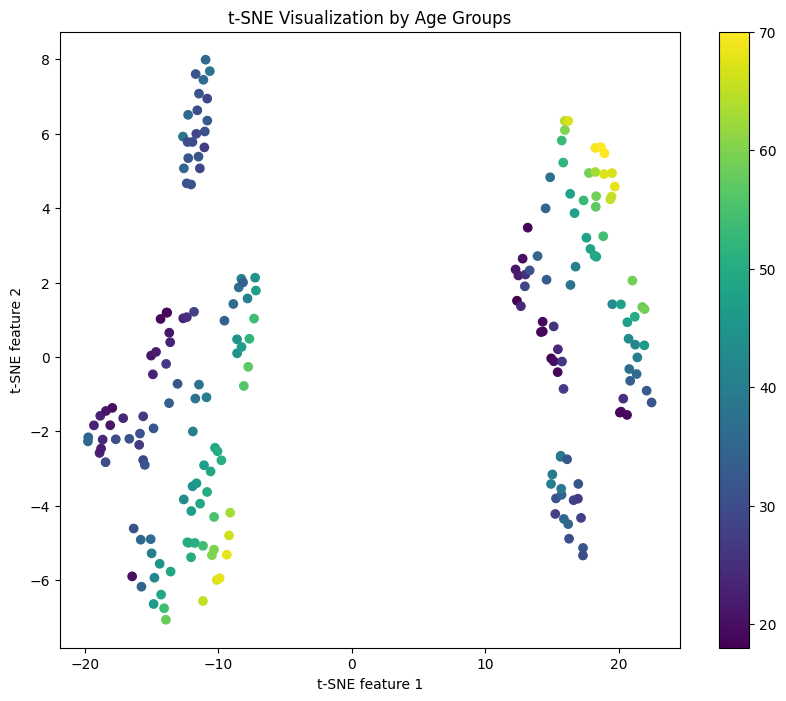

In [ ]:
# Конвертация категориальных данных
categorical_features = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_features)
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])
# Масштабирование данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Age'], cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE Visualization by Age Groups')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

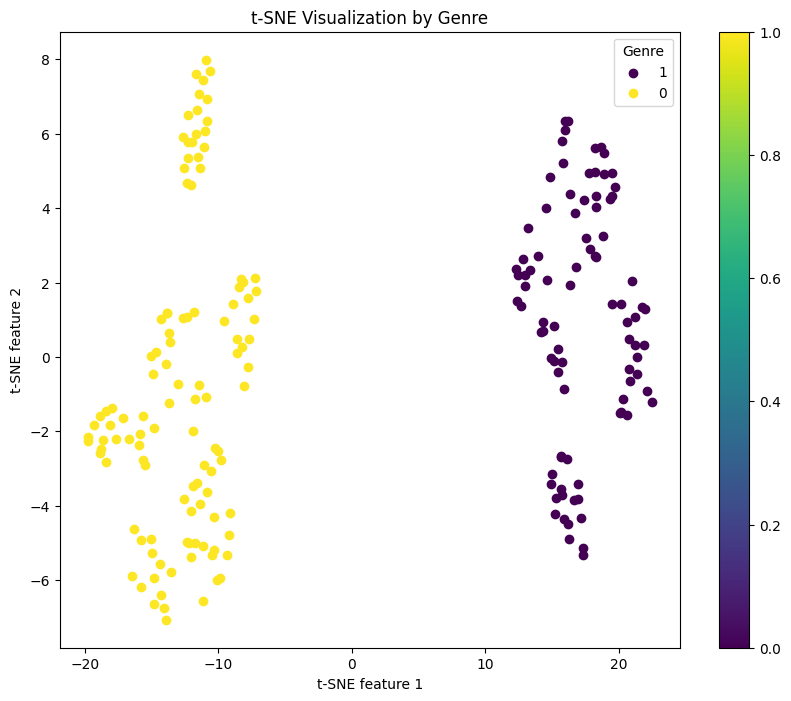

In [ ]:
# Применение t-SNE
tsne5 = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results5 = tsne5.fit_transform(scaled_features)

# Визуализация
# Присваиваем каждой категории уникальный цвет
unique_groups = df['Genre'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))
color_dict = dict(zip(unique_groups, colors))

# Создаем массив цветов для каждой точки в tsne_results
point_colors = [color_dict[age] for age in df['Genre']]

# Визуализация
plt.figure(figsize=(10, 8))
for group, color in color_dict.items():
    idx = df['Genre'] == group
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], c=[color], label=group)
plt.colorbar()
plt.title('t-SNE Visualization by Genre')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Genre')
plt.show()

1. Яркая демаркация между группами: График показывает чёткое разделение между двумя группами потребителей, что вероятно соответствует различиям по полу клиентов (женский и мужской). Это разделение может быть связано с различием в покупательских привычках или предпочтениях, которые отличаются у разных полов.

2. Кластеры внутри групп: Внутри каждой группы (мужчины и женщины) можно заметить формирование кластеров, что может указывать на наличие подгрупп с различными демографическими характеристиками или особенностями потребления. Это может быть полезным для маркетинговых стратегий, направленных на более точечное взаимодействие с определёнными сегментами клиентов.

3. Сложности интерпретации без контекста: Хотя t-SNE хорошо визуализирует пространственное разделение в данных, интерпретировать, что именно вызывает эти различия, может быть сложно без дополнительного контекста или анализа данных.

In [ ]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

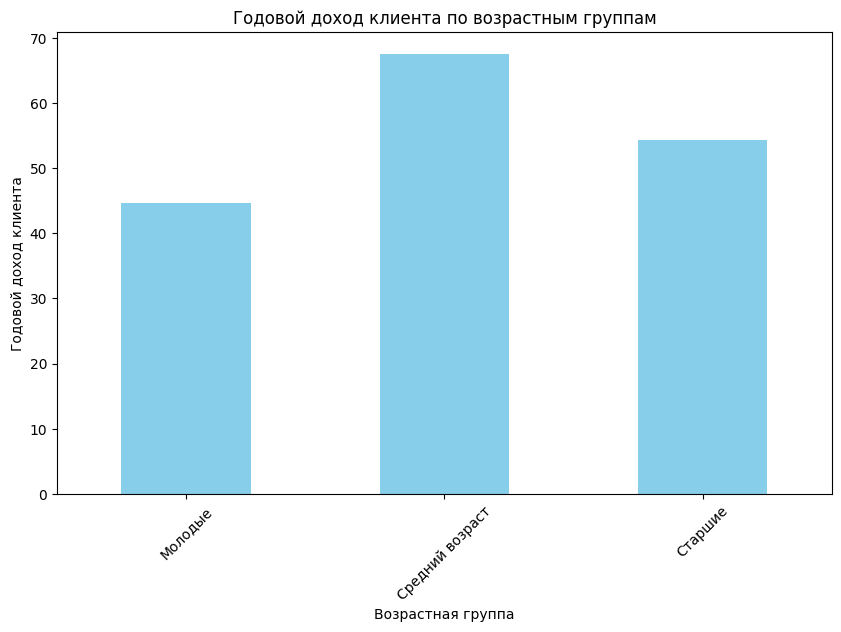

In [ ]:
bins = [0, 25, 50, 75]
labels = ['Молодые', 'Средний возраст', 'Старшие']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Агрегация данных по возрастной группе
age_group_purchases = df.groupby('Age Group')['Annual Income (k$)'].mean()

# Визуализация
plt.figure(figsize=(10, 6))
age_group_purchases.plot(kind='bar', color='skyblue')
plt.title('Годовой доход клиента по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Годовой доход клиента')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Age Group'] = LabelEncoder().fit_transform(df['Age Group'])
categorical_features = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_features)


# Масштабирование данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

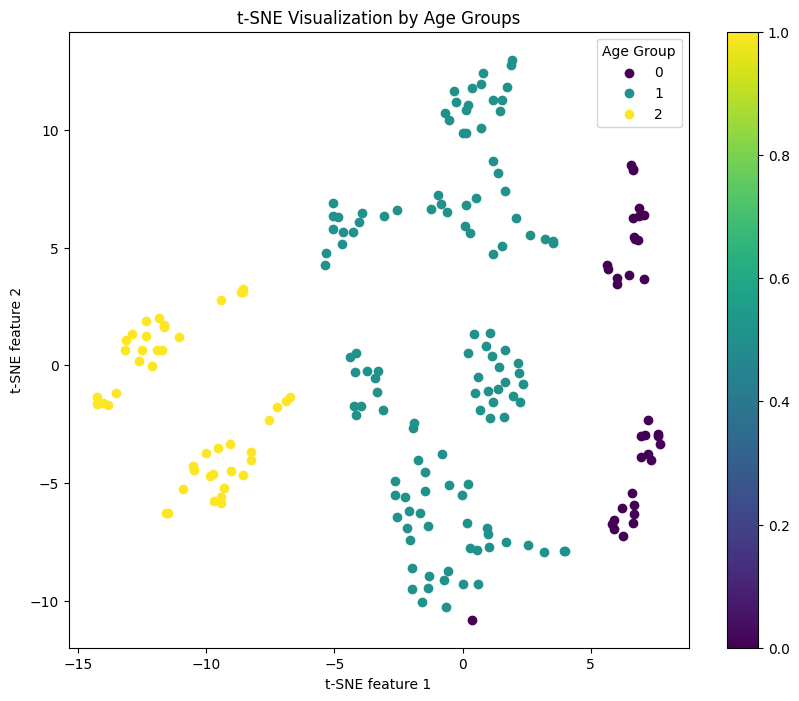

In [ ]:
# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Визуализация
# Присваиваем каждой категории уникальный цвет
unique_groups = df['Age Group'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))
color_dict = dict(zip(unique_groups, colors))

# Создаем массив цветов для каждой точки в tsne_results
point_colors = [color_dict[age] for age in df['Age Group']]

# Визуализация
plt.figure(figsize=(10, 8))
for group, color in color_dict.items():
    idx = df['Age Group'] == group
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], c=[color], label=group)
plt.colorbar()
plt.title('t-SNE Visualization by Age Groups')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Age Group')
plt.show()

1. Эффективность визуализации: t-SNE эффективно справился с задачей понижения размерности, выделив чёткие кластеры, которые позволяют визуально разделить данные по возрастным группам.

2. Разделение по возрастным группам: На графике наблюдается чёткое разделение групп потребителей по возрасту, что указывает на различия в потребительском поведении и привычках покупок между разными возрастными категориями. Это может быть связано с разными потребностями, предпочтениями или финансовыми возможностями у различных возрастных групп.

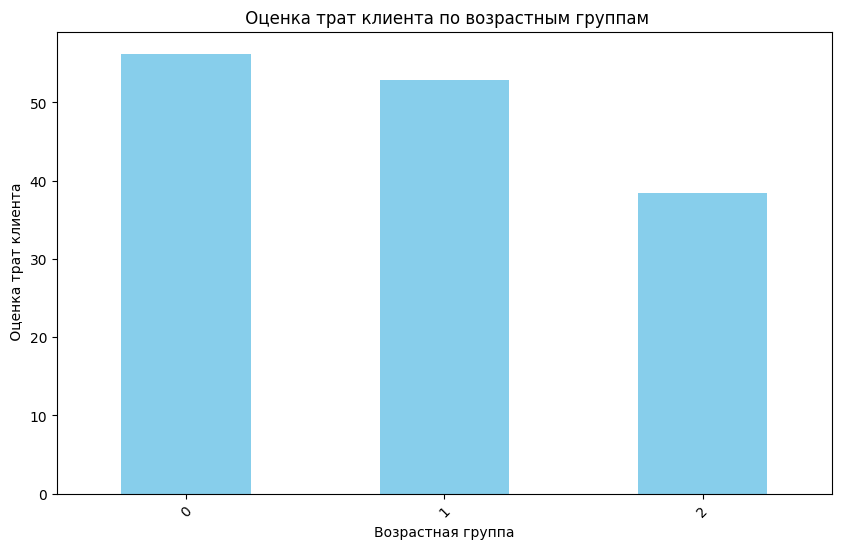

In [ ]:
# Агрегация данных по возрастной группе
age_group_purchases = df.groupby('Age Group')['Spending Score (1-100)'].mean()

# Визуализация
plt.figure(figsize=(10, 6))
age_group_purchases.plot(kind='bar', color='skyblue')
plt.title(' Оценка трат клиента по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel(' Оценка трат клиента')
plt.xticks(rotation=45)
plt.show()

##Задание 3

**Применение UMAP для анализа текстовых данных**
 - Используйте UMAP для понижения размерности векторов Tf-idf, полученных из набора текстовых данных

 - Анализируйте распределение текстов по темам на 2D графике, используя различные цвета для разных категорий текстов.
 - Используйте UMAP для визуализации авторов статей в контексте их текстов и метки фейковости, можно исследовать, какие авторы чаще всего связаны с фейковыми новостями и обнаружить возможные сети авторов, причастных к распространению дезинформации.
 - Используйте LLE для понижения размерности векторов Tf-idf, полученных из набора текстовых данных




UMAP (Uniform Manifold Approximation and Projection) - это алгоритм машинного обучения для нелинейного снижения размерности данных, который может быть использован для визуализации высокомерных данных.

Основные особенности UMAP:
- Основан на теории топологических пространств: UMAP использует концепции теории топологических пространств, таких как локальная связность и глобальная связность, для построения низкоразмерных представлений данных.
- Сохранение локальной и глобальной структуры: UMAP стремится сохранить как локальную, так и глобальную структуру данных при отображении в низкоразмерное пространство. Это позволяет выявлять кластеры и взаимосвязи между данными.
- Быстрая сходимость: UMAP сходится быстрее, чем другие алгоритмы снижения размерности, такие как t-SNE, что делает его более эффективным для работы с большими наборами данных.
- Масштабируемость: UMAP может эффективно работать с данными высокой размерности и больших объемов, в отличие от некоторых других методов снижения размерности.
- Гибкость настройки: UMAP имеет несколько настраиваемых гиперпараметров, которые позволяют пользователю контролировать баланс между сохранением локальной и глобальной структуры данных.

Основные этапы применения UMAP:
- Предобработка данных (нормализация, стандартизация)
Выбор гиперпараметров UMAP (например, количество соседей, минимальное расстояние)
- Применение алгоритма UMAP для проецирования данных в 2D или 3D пространство
- Визуализация полученного низкомерного представления данных
- UMAP широко используется в задачах визуализации высокомерных данных, таких как изображения, текстовые данные, биологические данные. Он показывает хорошие результаты в сравнении с другими методами снижения размерности, такими как PCA и t-SNE, особенно при работе с большими наборами данных.

Основные гиперпараметры UMAP

`n_neighbors (количество соседей)`: Определяет размер локальной окрестности для каждой точки. Влияет на сохранение локальной структуры данных.  
`min_dist (минимальное расстояние)`: Контролирует плотность кластеров в низкоразмерном пространстве. Меньшие значения приводят к более плотным кластерам.  
`metric (метрика расстояния)`: Определяет, какая метрика расстояния будет использоваться для вычисления близости между точками. Например, евклидово расстояние, манхэттенское расстояние, косинусное расстояние и др.  
`n_components (число компонент)`: Задает размерность выходного пространства, обычно 2 или 3 для визуализации.  
`random_state (состояние генератора случайных чисел)`: Устанавливает начальное состояние генератора случайных чисел для воспроизводимости результатов.  

Дополнительные гиперпараметры  
`spread (разброс)`: Контролирует разброс точек в выходном пространстве. Большие значения приводят к более растянутым кластерам.  
`set_op_mix_ratio (коэффициент смешивания операций)`: Определяет баланс между локальной и глобальной структурой при построении графа близости.  
`local_connectivity (локальная связность)`: Задает минимальную локальную связность для точек в исходном пространстве.  
`repulsion_strength (сила отталкивания)`: Контролирует силу отталкивания между точками в выходном пространстве.

In [ ]:
! pip install nltk

In [ ]:
from sklearn.decomposition import TruncatedSVD
from umap import UMAP
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data (1)/fake_news.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df.dropna(inplace = True)

![](https://avatars.mds.yandex.net/i?id=c909b80a23e46f34a8e6b24748b48c2ea02423d6-9151250-images-thumbs&n=13)

![](https://www.pvsm.ru/images/2018/08/21/anatomiya-rekomendatelnyh-sistem-chast-pervaya-8.jpg)

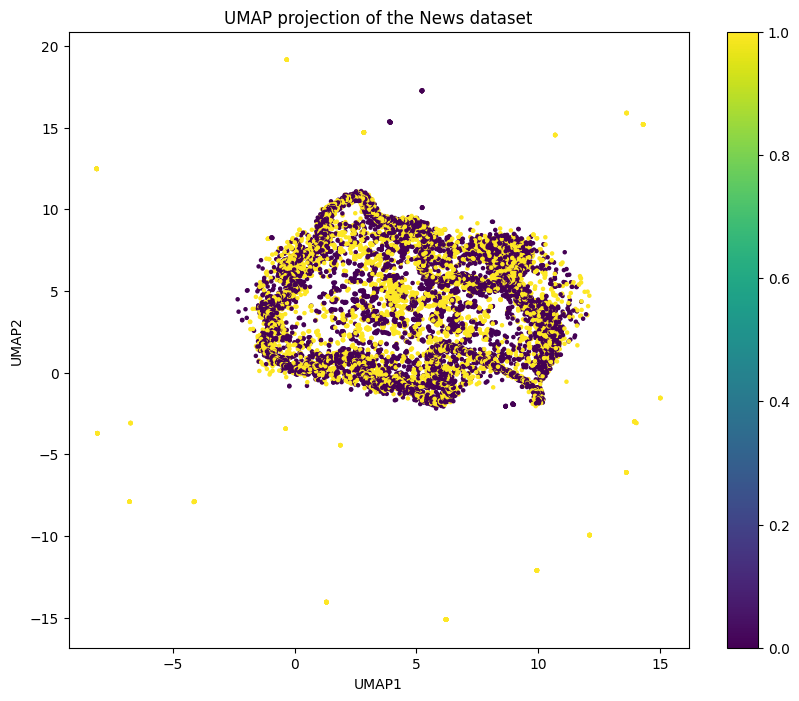

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
# Предобработка данных
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df[['title', 'author', 'text']] = imputer.fit_transform(df[['title', 'author', 'text']])
# Предобработка данных
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    # Токенизация по словам и приведение к нижнему регистру
    words = nltk.word_tokenize(text.lower())
    # Удаление стоп-слов и пунктуации
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

df['cleaned_text'] = df['text'].apply(preprocess)

# Векторизация текста с помощью TF-IDF
vectorizer = TfidfVectorizer().fit(df['cleaned_text'])
features = vectorizer.transform(df['cleaned_text'])
# Понижение размерности с помощью UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(features)
# umap.plot.points(X_umap, labels=df['labels'])
# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP projection of the News dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


In [ ]:
features

<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

1. Кластеризация:
   - Основной кластер данных расположен в центре диаграммы. Это может означать, что набор данных имеет несколько сходных характеристик или переменных.
   - Некоторые точки (выбросы) находятся далеко от основного кластера, что может указывать на различия в этих данных или редкие события.

2. Цветовая шкала:
   - Шкала рядом с графиком варьируется от 0.0 до 1.0, где цвета от фиолетового к желтому представляют диапазон значений плотности или других метрик, которые могли быть использованы при визуализации.
   - Темный фиолетовый цвет обозначает низкие значения, а яркий желтый — высокие.

3. Оси:
   - Оси UMAP1 и UMAP2 представляют собой двумерные компоненты, полученные в результате применения алгоритма UMAP к данным. Эти оси не имеют непосредственного физического смысла, но они демонстрируют, как данные кластеризуются и разделяются в новом пространстве признаков.

Выводы:
- График показывает, что большинство данных сильно сконцентрировано в одном кластере, но также присутствуют иные разбросанные данные, что может потребовать дальнейшего анализа для понимания причин их разрыва.
- Цветовая индикация позволяет оценить плотность данных или другую переменную на графике.

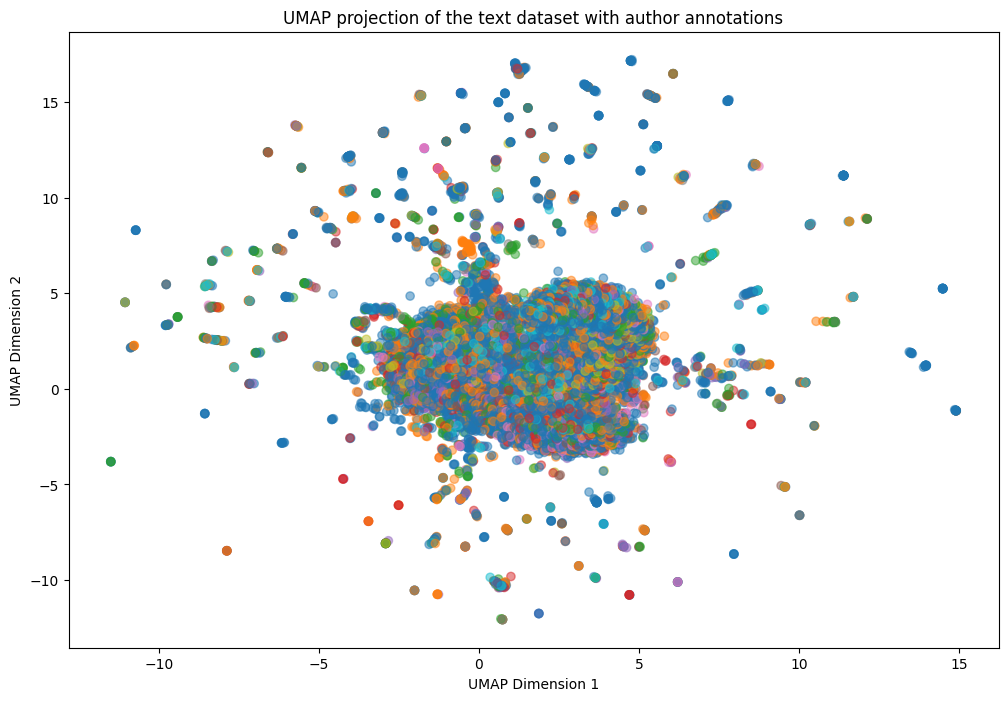

In [ ]:
# Применение UMAP
umap_model = UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(features)

# Визуализация
plt.figure(figsize=(12, 8))
unique_authors = df['author'].dropna().unique()
colors = plt.cm.get_cmap('tab10', len(unique_authors))
author_to_color = {author: colors(i) for i, author in enumerate(unique_authors)}

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=[author_to_color.get(author, (0, 0, 0, 1)) for author in df['author']], alpha=0.5)
plt.title('UMAP projection of the text dataset with author annotations')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

1. Кластеризация:
   - Имеется большое скопление точек в центре графика, что может указывать на наличие группы текстов, которые обладают схожими характеристиками и, возможно, написаны одним или несколькими авторами с похожим стилем.

2. Дисперсия:
   - Значительное количество точек расположено далеко от центра, что свидетельствует о наличии текстов, сильно отличающихся по характеристикам от центрального кластера.

3. Размер кластеров:
   - Центральное скопление кажется наиболее плотным, что может указывать на наличие более популярного автора или группы авторов с похожими текстами. Остальные точки разбросаны шире, что может означать наличие более уникальных текстов, связанных с меньшим количеством авторов.



In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Предобработка данных
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df[['title', 'author', 'text']] = imputer.fit_transform(df[['title', 'author', 'text']])

# Векторизация текста
tfidf_vectorizer = TfidfVectorizer(max_features=100)
text_features = tfidf_vectorizer.fit_transform(df['text']).toarray()

# Применение LLE
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(text_features)

print(X_lle)

[[ 6.57977304e-07 -1.94631704e-05]
 [-2.90506317e-07  1.22423118e-04]
 [ 1.06830862e-06 -2.49592357e-05]
 ...
 [ 1.33220007e-07 -1.89322818e-05]
 [ 2.93607539e-07 -2.47299934e-05]
 [ 5.94755089e-08 -1.74587597e-05]]


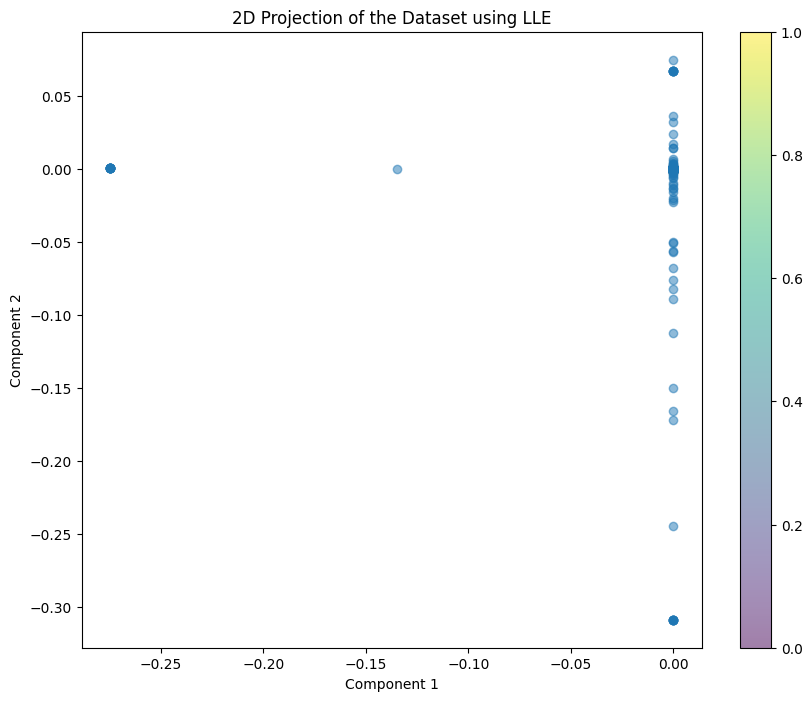

In [ ]:
import matplotlib.pyplot as plt

# Предполагая, что X_lle уже получен из предыдущего кода
plt.figure(figsize=(10, 8))
plt.scatter(X_lle[:, 0], X_lle[:, 1], alpha=0.5)
plt.title('2D Projection of the Dataset using LLE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

##Домашнее задание

Использование алгоритмов понижения размерности для улучшения классификации новостей (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

Цель задания: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Датасет: Набор данных новостных статей (датасет '20 Newsgroups' доступный в `sklearn.datasets`).

Задачи:

1. Загрузите датасет '20 Newsgroups' из sklearn.
2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).
3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:
   - PCA (Principal Component Analysis)
   - t-SNE (t-distributed Stochastic Neighbor Embedding)
   - UMAP (Uniform Manifold Approximation and Projection)
4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.
5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.
6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.
7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
y_train = newsgroups_train.target